# Mount Drive and Preparing Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip the dataset
%cd /content
!unzip "/content/Aquarium Combined.v2-raw-1024.coco-mmdetection.zip" -d aquarium_dataset


# Understanding the Dataset

In [2]:
import json

train_annotation_file = "/content/aquarium_dataset/train/_annotations.coco.json"
validation_annotation_file = "/content/aquarium_dataset/valid/_annotations.coco.json"
test_annotation_file = "/content/aquarium_dataset/test/_annotations.coco.json"


train_dataset_path = "/content/aquarium_dataset/train"
valid_dataset_path = "/content/aquarium_dataset/valid"
test_dataset_path = "/content/aquarium_dataset/test"



def get_category_info(coco_json_data):
    categories = coco_json_data.get('categories', [])
    num_categories = len(categories)
    category_names = [category['name'] for category in categories]

    return num_categories, category_names

def get_image_info(coco_json_data):
    images = coco_json_data.get('images', [])
    num_images = len(images)

    return num_images

def get_annotation_info(coco_json_data):
    annotations = coco_json_data.get('annotations', [])
    num_annotations = len(annotations)

    return num_annotations




files = {
    "train_annotation":train_annotation_file,
    "validation_annotation":validation_annotation_file,
    "test_annotation":test_annotation_file,

}

for file_type, file in files.items():

  # reading file
  with open(file, "r") as f:
    annotations = json.load(f)


  num_categories, category_names = get_category_info(annotations)
  num_images = get_image_info(annotations)
  num_annotations = get_annotation_info(annotations)

  print("Split Type: ", file_type)

  print(f"Number of categories: {num_categories}")
  print(f"Category names: {category_names}")
  print(f"Number of images: {num_images}")
  print(f"Number of annotations: {num_annotations}")
  print()



Split Type:  train_annotation
Number of categories: 7
Category names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
Number of images: 448
Number of annotations: 3324

Split Type:  validation_annotation
Number of categories: 7
Category names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
Number of images: 127
Number of annotations: 909

Split Type:  test_annotation
Number of categories: 7
Category names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
Number of images: 63
Number of annotations: 584



# Verifying Dataset Quality


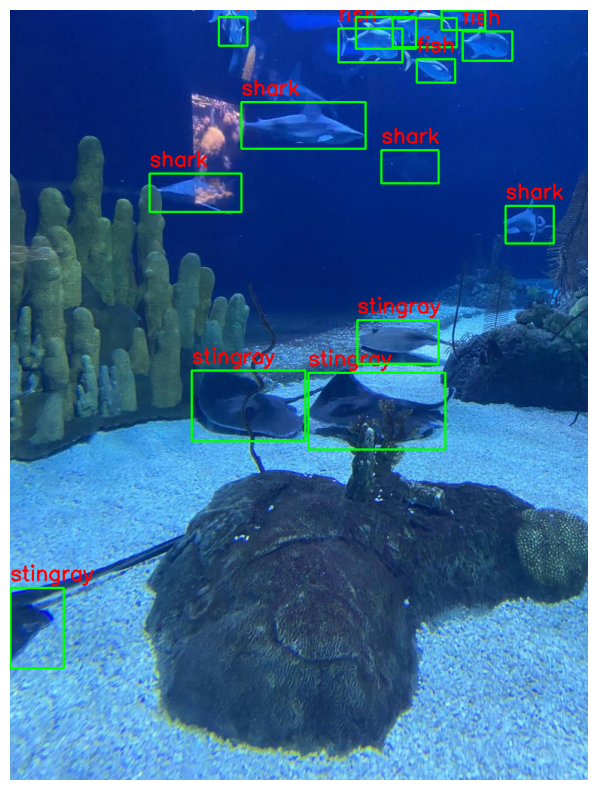

In [3]:
import json
import random
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def visualize_random_image(annotation_file, image_folder_path):
    with open(annotation_file, "r") as f:
        coco_data = json.load(f)

    images = coco_data['images']
    annotations = coco_data['annotations']
    categories = {category['id']: category['name'] for category in coco_data['categories']}

    # Taking a random image
    random_image_info = random.choice(images)
    image_id = random_image_info['id']
    image_filename = random_image_info['file_name']
    image_path = os.path.join(image_folder_path, image_filename)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]

    # Draw bounding boxes and class names on the image
    for ann in image_annotations:
        bbox = ann['bbox']
        category_id = ann['category_id']
        category_name = categories[category_id]

        x_min, y_min, width, height = bbox
        x_min, y_min = int(x_min), int(y_min)
        x_max, y_max = x_min + int(width), y_min + int(height)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        cv2.putText(image, category_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

annotation_file = train_annotation_file
image_folder_path = train_dataset_path

visualize_random_image(annotation_file, image_folder_path)


# Installation

In [4]:
# verifying torch with cuda
import torch

print(torch.cuda.is_available())

True


In [1]:
!pip install -U openmim
!mim install mmengine

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html


In [6]:
!unzip /content/mmcv-2.1.0.zip
!pip install /content/mmcv-2.1.0-cp310-cp310-linux_x86_64.whl

Archive:  /content/mmcv-2.1.0.zip
  inflating: mmcv-2.1.0-cp310-cp310-linux_x86_64.whl  
Processing ./mmcv-2.1.0-cp310-cp310-linux_x86_64.whl


In [7]:
%cd /content/
!git clone https://github.com/open-mmlab/mmcv.git
%cd mmcv

/content
Cloning into 'mmcv'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 17018 (delta 117), reused 90 (delta 51), pack-reused 16825 (from 1)
Receiving objects: 100% (17018/17018), 14.09 MiB | 30.96 MiB/s, done.
Resolving deltas: 100% (12498/12498), done.
/content/mmcv


In [8]:
pip install -r requirements/optional.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 6.5 MB/s eta 0:00:00


In [9]:
!python .dev_scripts/check_installation.py

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Start checking the installation of mmcv ...
CPU ops were compiled successfully.
CUDA ops were compiled successfully.
mmcv has been installed successfully.

Environment information:
------------------------------------------------------------
sys.platform: linux
Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
CUDA available: True
MUSA available: False
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 12.2, V12.2.140
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.4.0+cu121
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kern

In [10]:
%cd /content
!git clone https://github.com/open-mmlab/mmdetection.git
%cd /content/mmdetection


/content
Cloning into 'mmdetection'...
remote: Enumerating objects: 38023, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 38023 (delta 0), reused 1 (delta 0), pack-reused 38019 (from 1)
Receiving objects: 100% (38023/38023), 63.18 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (26236/26236), done.
/content/mmdetection


In [11]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [12]:
!gcc --version


gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [13]:
!mim install mmdet

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.7 MB/s eta 0:00:00


In [14]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 13.4 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection


In [15]:
%cd /content/mmdetection/
!python demo/image_demo.py demo/demo.jpg rtmdet_tiny_8xb32-300e_coco.py --weights rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth --device cuda

/content/mmdetection
/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
/usr/local/lib/python3.10/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unp

# Training


In [2]:
# copying the config file
!cp -vr /content/mmdetection/configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py /content/mmdetection/configs/faster-rcnn_custom.py

'/content/mmdetection/configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py' -> '/content/mmdetection/configs/faster-rcnn_custom.py'


In [3]:
%cd /content/mmdetection
!python tools/train.py configs/faster-rcnn_custom.py #--resume /content/mmdetection/work_dirs/faster-rcnn_custom/epoch_12.pth


/content/mmdetection
/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
09/07 16:34:10 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 835620728
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.4.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R)

## Visualization

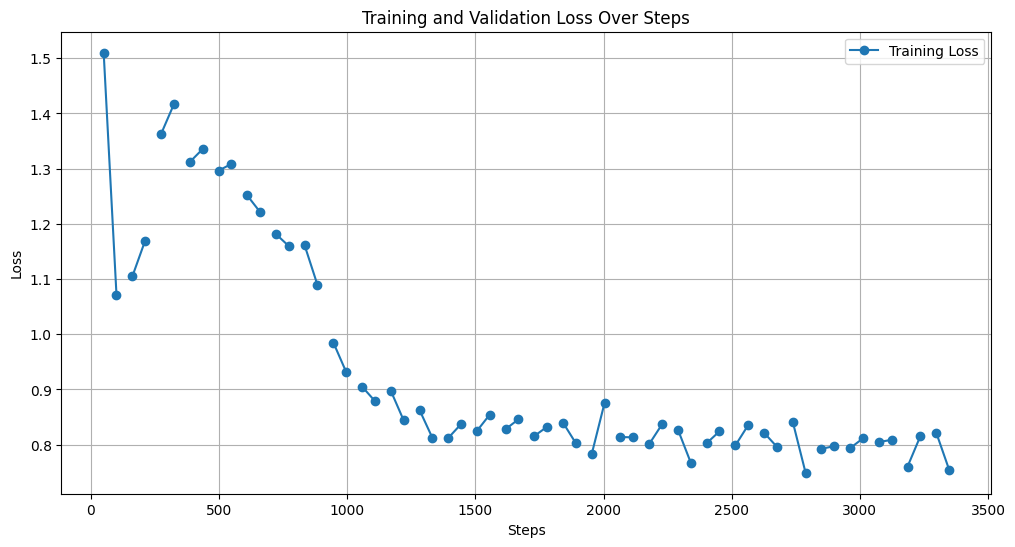

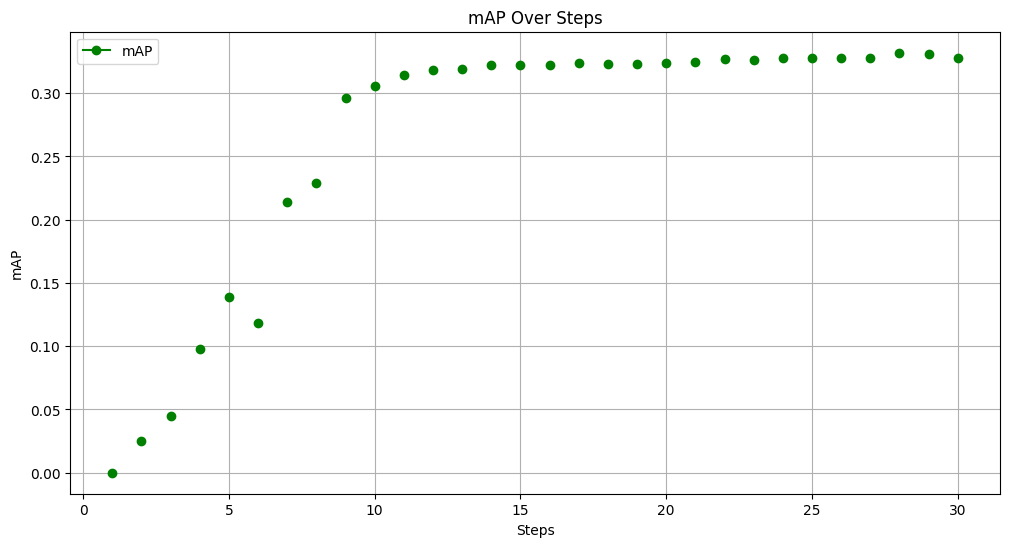

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Path to your scalars.json file
json_file_path = '/content/mmdetection/work_dirs/faster-rcnn_custom/20240907_163408/vis_data/scalars.json'

# Read the file line by line and parse each JSON object
data = []
with open(json_file_path, 'r') as f:
    for line in f:
        # Load each line as a JSON object
        data.append(json.loads(line))

# Convert the list of JSON objects into a pandas DataFrame
df = pd.DataFrame(data)

# Plot training loss over steps
plt.figure(figsize=(12, 6))
plt.plot(df['step'], df['loss'], label='Training Loss', marker='o')

# If validation loss exists, plot it (replace 'val_loss' with actual key if needed)
if 'val_loss' in df.columns:
    plt.plot(df['step'], df['val_loss'], label='Validation Loss', marker='x')

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Steps')
plt.legend()
plt.grid(True)
plt.show()

# Optionally plot mAP if it exists
if 'coco/bbox_mAP' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['step'], df['coco/bbox_mAP'], label='mAP', marker='o', color='green')
    plt.xlabel('Steps')
    plt.ylabel('mAP')
    plt.title('mAP Over Steps')
    plt.legend()
    plt.grid(True)
    plt.show()


# Evaluation

In [5]:
!python demo/image_demo.py /content/aquarium_dataset/test/IMG_8343_jpg.rf.2d88000497d74d72aedc118b125a0c07.jpg  configs/faster-rcnn_custom.py --weights /content/mmdetection/work_dirs/faster-rcnn_custom/epoch_30.pth --device cuda


/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by local backend from path: /content/mmdetection/work_dirs/faster-rcnn_custom/epoch_30.pth
/usr/local/lib/python3.10/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitr

In [6]:
%cd /content/mmdetection
!python tools/test.py configs/faster-rcnn_custom.py /content/mmdetection/work_dirs/faster-rcnn_custom/epoch_30.pth  --show-dir "/content/mmdetection/outputs/latest"


/content/mmdetection
/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
09/07 17:35:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1156333219
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.4.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R